In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense,Dropout, Conv2D,LeakyReLU , MaxPool2D, UpSampling2D, Conv2DTranspose,BatchNormalization,AveragePooling2D,ZeroPadding2D 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import tensorflow
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

In [2]:
from time import time
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Reshape
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
# load an image from file
import sys
from numpy import load
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy import expand_dims

import pickle
from tensorflow.keras.preprocessing.image import array_to_img

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy import expand_dims
import numpy as np
import os

In [ ]:
datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    #preprocessing_function=preprocess_input,
    rescale=1/255,
    rotation_range=60,
    width_shift_range=20,
    height_shift_range=20,
    brightness_range=(.6,1.4),
    shear_range=0.8,
    zoom_range=[.5,1.9],
    channel_shift_range=.7,
    fill_mode="wrap",
    horizontal_flip=True)

In [ ]:
datagen.fit(X)

In [3]:
datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255)

In [ ]:
# setup generator
train_generator = datagen.flow_from_directory(
        directory=r"C:\Users\dedunn\Desktop\full_aerin",
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='rgb',
        batch_size=1,
        class_mode='input')

In [ ]:
true_generator = true_datagen.flow_from_directory(
        directory=r"C:\Users\dedunn\Desktop\full_aerin",
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='grayscale',
        batch_size=1,
        class_mode=None)

In [ ]:
valid_generator =datagen.flow_from_directory(
        directory=r"C:\Users\dedunn\Desktop\full_aerin_test",
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='rgb',
        batch_size=1,
        class_mode='categorical')

In [ ]:
true_valid_generator =true_datagen.flow_from_directory(
        directory=r"C:\Users\dedunn\Desktop\full_aerin_test",
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='rgb',
        batch_size=1,
        class_mode='categorical')

In [34]:
IMG_SIZE=28

In [ ]:
for features, label in training_data:   
    X.append(features)
    y.append(label)
#X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
X=X.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [6]:
cat=os.listdir("/Users/denisdunn/Desktop/full_aerin")

In [12]:
cat.remove('.DS_Store')

In [ ]:
test=load_img(r"C:\Users\dedunn\Desktop\full_aerin\AERIN_AM_MOODBOARD_LR.jpg\AERIN_AM_MOODBOARD_LR.jpg")

In [39]:
training_data=[]

In [40]:
for image in range(len(cat)):
    test=("/Users/denisdunn/Desktop/full_aerin/{}/{}").format(cat[image],cat[image])
    #test=load_img(r"C:\Users\dedunn\Desktop\full_aerin\{}\{}").format(cat[image],cat[image])
    img_array = cv2.imread(test,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)).astype('float32')
    test_image = new_array[...,::-1]
    #test=load_img(test)
    #dims=expand_dims(test,0)
    #dims=cv2.resize(dims,(IMG_SIZE,IMG_SIZE)).astype('uint8')
    training_data.append(test_image)

In [42]:
training_data[0].shape

(28, 28)

In [ ]:
array_to_img(training_data[3])

In [ ]:
datagen.fit(X)

In [43]:
X=np.array(training_data)

In [59]:
X=X.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [60]:
X.shape

(43, 28, 28, 1)

In [ ]:
X=X/255

In [ ]:
DATADIR=r"C:\Users\dedunn\Desktop\full_aerin"
CATEGORIES=cat

In [ ]:
def create_training_data():
    for category in CATEGORIES:
        path =  os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                #img_array=img_to_array(img)
                #img_array=expand_dims(img_array, 0)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)).astype('float32')
                test_image = img_array[...,::-1]
                training_data.append([test_image,class_num])
            except Exception as e:
                pass
create_training_data()
#cv2.IMREAD_GRAYSCALE

In [ ]:
Input_img = tensorflow.keras.Input(shape=(28, 28, 1),dtype='float32')  
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# decoding architecture
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x5 = UpSampling2D((2, 2))(x4)
x6 = Conv2D(128, (3, 3), activation='relu', padding='same')(x5)
x7 = Conv2D(256, (3, 3), activation='relu', padding='same')(x6)
decoded = Conv2D(1, (3, 3),activation='sigmoid', padding='same')(x7)

autoencoder = Model([Input_img, decoded])
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples,
    epochs=epochs,

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(X,X,
            epochs=50,
            #shuffle=True,
            steps_per_epoch=44,
            validation_data=(X, X))
            #callbacks=[early_stopper])

In [193]:
def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    #encoder.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    #encoder.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    #encoder.add(MaxPool2D( (2, 2)))
    #encoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size)))
    #decoder.add(Reshape(img_shape))
    #decoder.add(UpSampling2D(interpolation='nearest'))
    #decoder.add(Reshape(img_shape))
    #decoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    #decoder.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    #decoder.add(UpSampling2D((2,2)))
    #decoder.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    #decoder.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    decoder.add(Flatten())
    decoder.add(Dense(np.prod(img_shape)))
    #decoder.add(UpSampling2D(2,2))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))
    #decoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
    return encoder, decoder

In [194]:
print(encoder.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


In [195]:
print(decoder.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 784)               25872     
_________________________________________________________________
reshape_7 (Reshape)          (None, 28, 28, 1)         0         
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


In [196]:
IMG_SHAPE = X.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 32)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='nadam', loss='mse')

print(autoencoder.summary())

Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_14 (Sequential)   (None, 32)                26176     
_________________________________________________________________
sequential_15 (Sequential)   (None, 28, 28, 1)         641312    
Total params: 667,488
Trainable params: 667,488
Non-trainable params: 0
_________________________________________________________________
None


In [197]:
history=autoencoder.fit(datagen.flow(X, X, batch_size=1),
                    steps_per_epoch=len(X), epochs=50000)

Epoch 1/50000
43/43 [==============================] - 0s 8ms/step - loss: 9330.4404
Epoch 2/50000
43/43 [==============================] - 0s 8ms/step - loss: 3435.3987
Epoch 3/50000
43/43 [==============================] - 0s 8ms/step - loss: 3398.7368
Epoch 4/50000
43/43 [==============================] - 0s 8ms/step - loss: 3388.5825
Epoch 5/50000
43/43 [==============================] - 0s 8ms/step - loss: 3380.0920
Epoch 6/50000
43/43 [==============================] - 0s 8ms/step - loss: 3376.3728
Epoch 7/50000
43/43 [==============================] - 0s 8ms/step - loss: 3433.1650
Epoch 8/50000
43/43 [==============================] - 0s 8ms/step - loss: 3359.9968
Epoch 9/50000
43/43 [==============================] - 0s 8ms/step - loss: 3382.5022
Epoch 10/50000
43/43 [==============================] - 0s 8ms/step - loss: 3351.3271
Epoch 11/50000
43/43 [==============================] - 0s 8ms/step - loss: 3375.4241
Epoch 12/50000
43/43 [==============================] - 0s 9ms/

43/43 [==============================] - 0s 8ms/step - loss: 1759.4058
Epoch 97/50000
43/43 [==============================] - 0s 8ms/step - loss: 1746.8792
Epoch 98/50000
43/43 [==============================] - 0s 8ms/step - loss: 1763.9498
Epoch 99/50000
43/43 [==============================] - 0s 8ms/step - loss: 1756.2042
Epoch 100/50000
43/43 [==============================] - 0s 8ms/step - loss: 1738.9911
Epoch 101/50000
43/43 [==============================] - 0s 8ms/step - loss: 1731.6038
Epoch 102/50000
43/43 [==============================] - 0s 8ms/step - loss: 1733.9249
Epoch 103/50000
43/43 [==============================] - 0s 9ms/step - loss: 1732.9386
Epoch 104/50000
43/43 [==============================] - 0s 8ms/step - loss: 1728.2242
Epoch 105/50000
43/43 [==============================] - 0s 8ms/step - loss: 1715.2633
Epoch 106/50000
43/43 [==============================] - 0s 8ms/step - loss: 1710.1450
Epoch 107/50000
43/43 [==============================] - 0s 8m

43/43 [==============================] - 0s 7ms/step - loss: 1109.4410
Epoch 191/50000
43/43 [==============================] - 0s 7ms/step - loss: 1105.7047
Epoch 192/50000
43/43 [==============================] - 0s 7ms/step - loss: 1102.8284
Epoch 193/50000
43/43 [==============================] - 0s 7ms/step - loss: 1107.1332
Epoch 194/50000
43/43 [==============================] - 0s 7ms/step - loss: 1105.5283
Epoch 195/50000
43/43 [==============================] - 0s 7ms/step - loss: 1114.3905
Epoch 196/50000
43/43 [==============================] - 0s 7ms/step - loss: 1122.5422
Epoch 197/50000
43/43 [==============================] - 0s 7ms/step - loss: 1120.1042
Epoch 198/50000
43/43 [==============================] - 0s 7ms/step - loss: 1143.8320
Epoch 199/50000
43/43 [==============================] - 0s 7ms/step - loss: 1120.7660
Epoch 200/50000
43/43 [==============================] - 0s 7ms/step - loss: 1140.7047
Epoch 201/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 859.2203
Epoch 285/50000
43/43 [==============================] - 0s 7ms/step - loss: 850.2012
Epoch 286/50000
43/43 [==============================] - 0s 8ms/step - loss: 846.7844
Epoch 287/50000
43/43 [==============================] - 0s 8ms/step - loss: 844.6553
Epoch 288/50000
43/43 [==============================] - 0s 8ms/step - loss: 846.9073
Epoch 289/50000
43/43 [==============================] - 0s 8ms/step - loss: 849.5191
Epoch 290/50000
43/43 [==============================] - 0s 8ms/step - loss: 849.7851
Epoch 291/50000
43/43 [==============================] - 0s 7ms/step - loss: 873.1411
Epoch 292/50000
43/43 [==============================] - 0s 10ms/step - loss: 870.9420
Epoch 293/50000
43/43 [==============================] - 0s 8ms/step - loss: 898.2613
Epoch 294/50000
43/43 [==============================] - 0s 7ms/step - loss: 861.8806
Epoch 295/50000
43/43 [==============================] - 0s 8ms/step 

43/43 [==============================] - 0s 7ms/step - loss: 633.3316
Epoch 380/50000
43/43 [==============================] - 0s 7ms/step - loss: 637.6352
Epoch 381/50000
43/43 [==============================] - 0s 7ms/step - loss: 653.0095
Epoch 382/50000
43/43 [==============================] - 0s 7ms/step - loss: 645.1093
Epoch 383/50000
43/43 [==============================] - 0s 7ms/step - loss: 656.7158
Epoch 384/50000
43/43 [==============================] - 0s 7ms/step - loss: 646.4572
Epoch 385/50000
43/43 [==============================] - 0s 7ms/step - loss: 637.6779
Epoch 386/50000
43/43 [==============================] - 0s 7ms/step - loss: 631.9637
Epoch 387/50000
43/43 [==============================] - 0s 7ms/step - loss: 630.0991
Epoch 388/50000
43/43 [==============================] - 0s 7ms/step - loss: 624.0734
Epoch 389/50000
43/43 [==============================] - 0s 7ms/step - loss: 623.9361
Epoch 390/50000
43/43 [==============================] - 0s 7ms/step -

43/43 [==============================] - 0s 7ms/step - loss: 533.2668
Epoch 475/50000
43/43 [==============================] - 0s 7ms/step - loss: 540.6904
Epoch 476/50000
43/43 [==============================] - 0s 7ms/step - loss: 541.0404
Epoch 477/50000
43/43 [==============================] - 0s 7ms/step - loss: 541.6739
Epoch 478/50000
43/43 [==============================] - 0s 7ms/step - loss: 545.6871
Epoch 479/50000
43/43 [==============================] - 0s 9ms/step - loss: 546.5925
Epoch 480/50000
43/43 [==============================] - 0s 9ms/step - loss: 536.6171
Epoch 481/50000
43/43 [==============================] - 0s 10ms/step - loss: 540.3156
Epoch 482/50000
43/43 [==============================] - 0s 9ms/step - loss: 540.7979
Epoch 483/50000
43/43 [==============================] - 0s 7ms/step - loss: 549.8429
Epoch 484/50000
43/43 [==============================] - 0s 9ms/step - loss: 549.8206
Epoch 485/50000
43/43 [==============================] - 0s 8ms/step 

43/43 [==============================] - 0s 10ms/step - loss: 502.9092
Epoch 570/50000
43/43 [==============================] - 0s 8ms/step - loss: 507.0639
Epoch 571/50000
43/43 [==============================] - 0s 10ms/step - loss: 502.8426
Epoch 572/50000
43/43 [==============================] - 0s 9ms/step - loss: 508.5518
Epoch 573/50000
43/43 [==============================] - 0s 9ms/step - loss: 525.3796
Epoch 574/50000
43/43 [==============================] - 0s 8ms/step - loss: 527.2067
Epoch 575/50000
43/43 [==============================] - 0s 7ms/step - loss: 518.6389
Epoch 576/50000
43/43 [==============================] - 0s 7ms/step - loss: 516.8128
Epoch 577/50000
43/43 [==============================] - 0s 7ms/step - loss: 518.5829
Epoch 578/50000
43/43 [==============================] - 0s 7ms/step - loss: 519.0147
Epoch 579/50000
43/43 [==============================] - 0s 7ms/step - loss: 515.8471
Epoch 580/50000
43/43 [==============================] - 0s 10ms/ste

43/43 [==============================] - 0s 7ms/step - loss: 461.8149
Epoch 665/50000
43/43 [==============================] - 0s 7ms/step - loss: 467.2415
Epoch 666/50000
43/43 [==============================] - 0s 7ms/step - loss: 462.5869
Epoch 667/50000
43/43 [==============================] - 0s 7ms/step - loss: 462.4333
Epoch 668/50000
43/43 [==============================] - 0s 7ms/step - loss: 470.6734
Epoch 669/50000
43/43 [==============================] - 0s 7ms/step - loss: 460.7083
Epoch 670/50000
43/43 [==============================] - 0s 7ms/step - loss: 470.4141
Epoch 671/50000
43/43 [==============================] - 0s 9ms/step - loss: 462.2770
Epoch 672/50000
43/43 [==============================] - 0s 9ms/step - loss: 461.6465
Epoch 673/50000
43/43 [==============================] - 0s 7ms/step - loss: 458.7319
Epoch 674/50000
43/43 [==============================] - 0s 9ms/step - loss: 457.1483
Epoch 675/50000
43/43 [==============================] - 0s 7ms/step -

43/43 [==============================] - 0s 10ms/step - loss: 418.1259
Epoch 760/50000
43/43 [==============================] - 0s 9ms/step - loss: 424.4320
Epoch 761/50000
43/43 [==============================] - 0s 10ms/step - loss: 431.5659
Epoch 762/50000
43/43 [==============================] - 0s 10ms/step - loss: 423.1687
Epoch 763/50000
43/43 [==============================] - 0s 10ms/step - loss: 425.9659
Epoch 764/50000
43/43 [==============================] - 0s 10ms/step - loss: 420.6047
Epoch 765/50000
43/43 [==============================] - 0s 10ms/step - loss: 417.7991
Epoch 766/50000
43/43 [==============================] - 0s 10ms/step - loss: 417.2058
Epoch 767/50000
43/43 [==============================] - 0s 9ms/step - loss: 416.9086
Epoch 768/50000
43/43 [==============================] - 0s 8ms/step - loss: 415.3134
Epoch 769/50000
43/43 [==============================] - 0s 7ms/step - loss: 411.0659
Epoch 770/50000
43/43 [==============================] - 0s 7ms

43/43 [==============================] - 0s 7ms/step - loss: 373.7835
Epoch 855/50000
43/43 [==============================] - 0s 9ms/step - loss: 373.7497
Epoch 856/50000
43/43 [==============================] - 0s 10ms/step - loss: 374.4088
Epoch 857/50000
43/43 [==============================] - 0s 8ms/step - loss: 372.8841
Epoch 858/50000
43/43 [==============================] - 0s 8ms/step - loss: 366.7370
Epoch 859/50000
43/43 [==============================] - 0s 7ms/step - loss: 365.4893
Epoch 860/50000
43/43 [==============================] - 0s 7ms/step - loss: 371.6147
Epoch 861/50000
43/43 [==============================] - 0s 7ms/step - loss: 375.6852
Epoch 862/50000
43/43 [==============================] - 0s 7ms/step - loss: 374.8205
Epoch 863/50000
43/43 [==============================] - 0s 7ms/step - loss: 374.3635
Epoch 864/50000
43/43 [==============================] - 0s 7ms/step - loss: 371.8176
Epoch 865/50000
43/43 [==============================] - 0s 7ms/step 

43/43 [==============================] - 0s 7ms/step - loss: 362.0206
Epoch 950/50000
43/43 [==============================] - 0s 7ms/step - loss: 362.1685
Epoch 951/50000
43/43 [==============================] - 0s 7ms/step - loss: 367.0784
Epoch 952/50000
43/43 [==============================] - 0s 7ms/step - loss: 364.7937
Epoch 953/50000
43/43 [==============================] - 0s 7ms/step - loss: 360.2022
Epoch 954/50000
43/43 [==============================] - 0s 7ms/step - loss: 365.3375
Epoch 955/50000
43/43 [==============================] - 0s 7ms/step - loss: 361.1660
Epoch 956/50000
43/43 [==============================] - 0s 7ms/step - loss: 356.7272
Epoch 957/50000
43/43 [==============================] - 0s 7ms/step - loss: 359.1197
Epoch 958/50000
43/43 [==============================] - 0s 7ms/step - loss: 357.0314
Epoch 959/50000
43/43 [==============================] - 0s 7ms/step - loss: 363.4946
Epoch 960/50000
43/43 [==============================] - 0s 7ms/step -

43/43 [==============================] - 0s 9ms/step - loss: 321.1586
Epoch 1044/50000
43/43 [==============================] - 0s 8ms/step - loss: 322.5179
Epoch 1045/50000
43/43 [==============================] - 0s 8ms/step - loss: 325.2643
Epoch 1046/50000
43/43 [==============================] - 0s 10ms/step - loss: 323.5894
Epoch 1047/50000
43/43 [==============================] - 0s 10ms/step - loss: 325.1559
Epoch 1048/50000
43/43 [==============================] - 0s 10ms/step - loss: 325.6443
Epoch 1049/50000
43/43 [==============================] - 0s 8ms/step - loss: 326.2910
Epoch 1050/50000
43/43 [==============================] - 0s 9ms/step - loss: 326.7556
Epoch 1051/50000
43/43 [==============================] - 0s 8ms/step - loss: 331.5568
Epoch 1052/50000
43/43 [==============================] - 0s 8ms/step - loss: 336.8983
Epoch 1053/50000
43/43 [==============================] - 0s 9ms/step - loss: 350.7178
Epoch 1054/50000
43/43 [==============================] -

43/43 [==============================] - 0s 7ms/step - loss: 324.6619
Epoch 1138/50000
43/43 [==============================] - 0s 7ms/step - loss: 330.3867
Epoch 1139/50000
43/43 [==============================] - 0s 7ms/step - loss: 326.7619
Epoch 1140/50000
43/43 [==============================] - 0s 7ms/step - loss: 330.8899
Epoch 1141/50000
43/43 [==============================] - 0s 7ms/step - loss: 335.8310
Epoch 1142/50000
43/43 [==============================] - 0s 7ms/step - loss: 340.2801
Epoch 1143/50000
43/43 [==============================] - 0s 7ms/step - loss: 342.0263
Epoch 1144/50000
43/43 [==============================] - 0s 7ms/step - loss: 340.0759
Epoch 1145/50000
43/43 [==============================] - 0s 7ms/step - loss: 341.2814
Epoch 1146/50000
43/43 [==============================] - 0s 7ms/step - loss: 338.4996
Epoch 1147/50000
43/43 [==============================] - 0s 7ms/step - loss: 331.8997
Epoch 1148/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 7ms/step - loss: 321.9593
Epoch 1232/50000
43/43 [==============================] - 0s 7ms/step - loss: 322.1371
Epoch 1233/50000
43/43 [==============================] - 0s 7ms/step - loss: 319.0925
Epoch 1234/50000
43/43 [==============================] - 0s 10ms/step - loss: 315.4421
Epoch 1235/50000
43/43 [==============================] - 0s 7ms/step - loss: 319.0217
Epoch 1236/50000
43/43 [==============================] - 0s 10ms/step - loss: 319.1846
Epoch 1237/50000
43/43 [==============================] - 0s 7ms/step - loss: 315.5609
Epoch 1238/50000
43/43 [==============================] - 0s 7ms/step - loss: 316.7507
Epoch 1239/50000
43/43 [==============================] - 0s 7ms/step - loss: 318.3865
Epoch 1240/50000
43/43 [==============================] - 0s 9ms/step - loss: 321.0509
Epoch 1241/50000
43/43 [==============================] - 0s 7ms/step - loss: 326.8707
Epoch 1242/50000
43/43 [==============================] - 

43/43 [==============================] - 0s 8ms/step - loss: 323.0006
Epoch 1326/50000
43/43 [==============================] - 0s 8ms/step - loss: 317.3114
Epoch 1327/50000
43/43 [==============================] - 0s 8ms/step - loss: 318.4870
Epoch 1328/50000
43/43 [==============================] - 0s 8ms/step - loss: 321.6277
Epoch 1329/50000
43/43 [==============================] - 0s 8ms/step - loss: 321.2383
Epoch 1330/50000
43/43 [==============================] - 0s 8ms/step - loss: 322.9007
Epoch 1331/50000
43/43 [==============================] - 0s 8ms/step - loss: 322.7806
Epoch 1332/50000
43/43 [==============================] - 0s 7ms/step - loss: 325.9463
Epoch 1333/50000
43/43 [==============================] - 0s 8ms/step - loss: 323.1358
Epoch 1334/50000
43/43 [==============================] - 0s 8ms/step - loss: 327.5169
Epoch 1335/50000
43/43 [==============================] - 0s 8ms/step - loss: 325.1008
Epoch 1336/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 317.2274
Epoch 1420/50000
43/43 [==============================] - 0s 8ms/step - loss: 318.9492
Epoch 1421/50000
43/43 [==============================] - 0s 8ms/step - loss: 317.3993
Epoch 1422/50000
43/43 [==============================] - 0s 8ms/step - loss: 317.0411
Epoch 1423/50000
43/43 [==============================] - 0s 8ms/step - loss: 316.4417
Epoch 1424/50000
43/43 [==============================] - 0s 8ms/step - loss: 314.5418
Epoch 1425/50000
43/43 [==============================] - 0s 8ms/step - loss: 318.1803
Epoch 1426/50000
43/43 [==============================] - 0s 8ms/step - loss: 315.0067
Epoch 1427/50000
43/43 [==============================] - 0s 8ms/step - loss: 315.7016
Epoch 1428/50000
43/43 [==============================] - 0s 8ms/step - loss: 318.9642
Epoch 1429/50000
43/43 [==============================] - 0s 8ms/step - loss: 324.6748
Epoch 1430/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 320.7437
Epoch 1514/50000
43/43 [==============================] - 0s 8ms/step - loss: 321.7524
Epoch 1515/50000
43/43 [==============================] - 0s 8ms/step - loss: 324.6436
Epoch 1516/50000
43/43 [==============================] - 0s 8ms/step - loss: 320.9475
Epoch 1517/50000
43/43 [==============================] - 0s 8ms/step - loss: 321.3149
Epoch 1518/50000
43/43 [==============================] - 0s 8ms/step - loss: 326.2583
Epoch 1519/50000
43/43 [==============================] - 0s 8ms/step - loss: 326.2160
Epoch 1520/50000
43/43 [==============================] - 0s 8ms/step - loss: 330.8961
Epoch 1521/50000
43/43 [==============================] - 0s 8ms/step - loss: 339.9166
Epoch 1522/50000
43/43 [==============================] - 0s 8ms/step - loss: 337.2712
Epoch 1523/50000
43/43 [==============================] - 0s 8ms/step - loss: 327.9083
Epoch 1524/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 287.3765
Epoch 1608/50000
43/43 [==============================] - 0s 8ms/step - loss: 290.6334
Epoch 1609/50000
43/43 [==============================] - 0s 8ms/step - loss: 289.7140
Epoch 1610/50000
43/43 [==============================] - 0s 8ms/step - loss: 290.4162
Epoch 1611/50000
43/43 [==============================] - 0s 8ms/step - loss: 288.0009
Epoch 1612/50000
43/43 [==============================] - 0s 8ms/step - loss: 288.4864
Epoch 1613/50000
43/43 [==============================] - 0s 8ms/step - loss: 282.2941
Epoch 1614/50000
43/43 [==============================] - 0s 8ms/step - loss: 281.1222
Epoch 1615/50000
43/43 [==============================] - 0s 8ms/step - loss: 283.9749
Epoch 1616/50000
43/43 [==============================] - 0s 8ms/step - loss: 279.3760
Epoch 1617/50000
43/43 [==============================] - 0s 8ms/step - loss: 280.8110
Epoch 1618/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 7ms/step - loss: 278.2374
Epoch 1702/50000
43/43 [==============================] - 0s 8ms/step - loss: 284.4539
Epoch 1703/50000
43/43 [==============================] - 0s 8ms/step - loss: 284.8730
Epoch 1704/50000
43/43 [==============================] - 0s 8ms/step - loss: 282.6492
Epoch 1705/50000
43/43 [==============================] - 0s 8ms/step - loss: 284.1572
Epoch 1706/50000
43/43 [==============================] - 0s 8ms/step - loss: 287.7017
Epoch 1707/50000
43/43 [==============================] - 0s 8ms/step - loss: 289.4161
Epoch 1708/50000
43/43 [==============================] - 0s 8ms/step - loss: 291.4203
Epoch 1709/50000
43/43 [==============================] - 0s 8ms/step - loss: 296.4759
Epoch 1710/50000
43/43 [==============================] - 0s 8ms/step - loss: 294.9878
Epoch 1711/50000
43/43 [==============================] - 0s 8ms/step - loss: 287.7463
Epoch 1712/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 291.0047
Epoch 1796/50000
43/43 [==============================] - 0s 8ms/step - loss: 298.6601
Epoch 1797/50000
43/43 [==============================] - 0s 8ms/step - loss: 298.2679
Epoch 1798/50000
43/43 [==============================] - 0s 8ms/step - loss: 300.2992
Epoch 1799/50000
43/43 [==============================] - 0s 8ms/step - loss: 294.8623
Epoch 1800/50000
43/43 [==============================] - 0s 8ms/step - loss: 290.1407
Epoch 1801/50000
43/43 [==============================] - 0s 8ms/step - loss: 283.9933
Epoch 1802/50000
43/43 [==============================] - 0s 8ms/step - loss: 284.0862
Epoch 1803/50000
43/43 [==============================] - 0s 8ms/step - loss: 283.0634
Epoch 1804/50000
43/43 [==============================] - 0s 8ms/step - loss: 282.7238
Epoch 1805/50000
43/43 [==============================] - 0s 8ms/step - loss: 280.3960
Epoch 1806/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 275.0103
Epoch 1890/50000
43/43 [==============================] - 0s 8ms/step - loss: 274.2610
Epoch 1891/50000
43/43 [==============================] - 0s 8ms/step - loss: 260.1892
Epoch 1892/50000
43/43 [==============================] - 0s 8ms/step - loss: 259.2729
Epoch 1893/50000
43/43 [==============================] - 0s 8ms/step - loss: 252.8164
Epoch 1894/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.3902
Epoch 1895/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.5876
Epoch 1896/50000
43/43 [==============================] - 0s 8ms/step - loss: 243.1635
Epoch 1897/50000
43/43 [==============================] - 0s 8ms/step - loss: 243.1727
Epoch 1898/50000
43/43 [==============================] - 0s 8ms/step - loss: 241.3091
Epoch 1899/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.5039
Epoch 1900/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 253.6555
Epoch 1984/50000
43/43 [==============================] - 0s 8ms/step - loss: 255.7637
Epoch 1985/50000
43/43 [==============================] - 0s 8ms/step - loss: 254.5124
Epoch 1986/50000
43/43 [==============================] - 0s 8ms/step - loss: 253.4990
Epoch 1987/50000
43/43 [==============================] - 0s 8ms/step - loss: 256.8047
Epoch 1988/50000
43/43 [==============================] - 0s 8ms/step - loss: 259.4503
Epoch 1989/50000
43/43 [==============================] - 0s 8ms/step - loss: 266.5720
Epoch 1990/50000
43/43 [==============================] - 0s 8ms/step - loss: 264.1544
Epoch 1991/50000
43/43 [==============================] - 0s 8ms/step - loss: 255.3670
Epoch 1992/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.9448
Epoch 1993/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.3257
Epoch 1994/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 241.8606
Epoch 2078/50000
43/43 [==============================] - 0s 8ms/step - loss: 244.8411
Epoch 2079/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.3927
Epoch 2080/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.3770
Epoch 2081/50000
43/43 [==============================] - 0s 8ms/step - loss: 255.1516
Epoch 2082/50000
43/43 [==============================] - 0s 8ms/step - loss: 253.4780
Epoch 2083/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.9134
Epoch 2084/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.7665
Epoch 2085/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.1025
Epoch 2086/50000
43/43 [==============================] - 0s 8ms/step - loss: 243.8481
Epoch 2087/50000
43/43 [==============================] - 0s 8ms/step - loss: 253.9425
Epoch 2088/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 250.5871
Epoch 2172/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.8657
Epoch 2173/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.8828
Epoch 2174/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.2562
Epoch 2175/50000
43/43 [==============================] - 0s 8ms/step - loss: 249.9823
Epoch 2176/50000
43/43 [==============================] - 0s 8ms/step - loss: 256.2881
Epoch 2177/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.4928
Epoch 2178/50000
43/43 [==============================] - 0s 8ms/step - loss: 246.3555
Epoch 2179/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.9183
Epoch 2180/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.6193
Epoch 2181/50000
43/43 [==============================] - 0s 8ms/step - loss: 244.3802
Epoch 2182/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 249.6526
Epoch 2266/50000
43/43 [==============================] - 0s 8ms/step - loss: 249.9916
Epoch 2267/50000
43/43 [==============================] - 0s 8ms/step - loss: 255.5144
Epoch 2268/50000
43/43 [==============================] - 0s 8ms/step - loss: 258.1652
Epoch 2269/50000
43/43 [==============================] - 0s 8ms/step - loss: 260.9039
Epoch 2270/50000
43/43 [==============================] - 0s 8ms/step - loss: 258.7642
Epoch 2271/50000
43/43 [==============================] - 0s 8ms/step - loss: 260.2168
Epoch 2272/50000
43/43 [==============================] - 0s 8ms/step - loss: 253.8302
Epoch 2273/50000
43/43 [==============================] - 0s 8ms/step - loss: 249.4361
Epoch 2274/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.7196
Epoch 2275/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.4525
Epoch 2276/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 250.6545
Epoch 2360/50000
43/43 [==============================] - 0s 7ms/step - loss: 250.3861
Epoch 2361/50000
43/43 [==============================] - 0s 8ms/step - loss: 251.5598
Epoch 2362/50000
43/43 [==============================] - 0s 8ms/step - loss: 258.1935
Epoch 2363/50000
43/43 [==============================] - 0s 8ms/step - loss: 254.1695
Epoch 2364/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.7835
Epoch 2365/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.9042
Epoch 2366/50000
43/43 [==============================] - 0s 8ms/step - loss: 251.5970
Epoch 2367/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.3528
Epoch 2368/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.2108
Epoch 2369/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.9755
Epoch 2370/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 241.1711
Epoch 2454/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.8947
Epoch 2455/50000
43/43 [==============================] - 0s 8ms/step - loss: 246.9496
Epoch 2456/50000
43/43 [==============================] - 0s 8ms/step - loss: 249.1146
Epoch 2457/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.6046
Epoch 2458/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.3397
Epoch 2459/50000
43/43 [==============================] - 0s 8ms/step - loss: 249.4534
Epoch 2460/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.1077
Epoch 2461/50000
43/43 [==============================] - 0s 8ms/step - loss: 253.2167
Epoch 2462/50000
43/43 [==============================] - 0s 8ms/step - loss: 258.0531
Epoch 2463/50000
43/43 [==============================] - 0s 8ms/step - loss: 252.1072
Epoch 2464/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 238.3148
Epoch 2548/50000
43/43 [==============================] - 0s 8ms/step - loss: 241.0863
Epoch 2549/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.1466
Epoch 2550/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.0325
Epoch 2551/50000
43/43 [==============================] - 0s 8ms/step - loss: 249.2454
Epoch 2552/50000
43/43 [==============================] - 0s 8ms/step - loss: 246.5486
Epoch 2553/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.1979
Epoch 2554/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.7272
Epoch 2555/50000
43/43 [==============================] - 0s 8ms/step - loss: 251.6786
Epoch 2556/50000
43/43 [==============================] - 0s 8ms/step - loss: 252.6815
Epoch 2557/50000
43/43 [==============================] - 0s 8ms/step - loss: 255.9057
Epoch 2558/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 253.1688
Epoch 2642/50000
43/43 [==============================] - 0s 8ms/step - loss: 256.9704
Epoch 2643/50000
43/43 [==============================] - 0s 8ms/step - loss: 252.4915
Epoch 2644/50000
43/43 [==============================] - 0s 8ms/step - loss: 249.2554
Epoch 2645/50000
43/43 [==============================] - 0s 8ms/step - loss: 252.8463
Epoch 2646/50000
43/43 [==============================] - 0s 8ms/step - loss: 252.4977
Epoch 2647/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.8364
Epoch 2648/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.4671
Epoch 2649/50000
43/43 [==============================] - 0s 8ms/step - loss: 252.6029
Epoch 2650/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.9086
Epoch 2651/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.4688
Epoch 2652/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 239.5322
Epoch 2736/50000
43/43 [==============================] - 0s 8ms/step - loss: 238.7039
Epoch 2737/50000
43/43 [==============================] - 0s 8ms/step - loss: 241.1419
Epoch 2738/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.7111
Epoch 2739/50000
43/43 [==============================] - 0s 8ms/step - loss: 238.7130
Epoch 2740/50000
43/43 [==============================] - 0s 8ms/step - loss: 238.2960
Epoch 2741/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.7317
Epoch 2742/50000
43/43 [==============================] - 0s 8ms/step - loss: 243.8472
Epoch 2743/50000
43/43 [==============================] - 0s 8ms/step - loss: 241.4521
Epoch 2744/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.3239
Epoch 2745/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.0677
Epoch 2746/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 253.4716
Epoch 2830/50000
43/43 [==============================] - 0s 8ms/step - loss: 264.4625
Epoch 2831/50000
43/43 [==============================] - 0s 8ms/step - loss: 250.7122
Epoch 2832/50000
43/43 [==============================] - 0s 8ms/step - loss: 244.7489
Epoch 2833/50000
43/43 [==============================] - 0s 8ms/step - loss: 238.3645
Epoch 2834/50000
43/43 [==============================] - 0s 8ms/step - loss: 241.2764
Epoch 2835/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.6211
Epoch 2836/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.0508
Epoch 2837/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.3739
Epoch 2838/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.6097
Epoch 2839/50000
43/43 [==============================] - 0s 8ms/step - loss: 244.9802
Epoch 2840/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 242.8704
Epoch 2924/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.8810
Epoch 2925/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.7190
Epoch 2926/50000
43/43 [==============================] - 0s 8ms/step - loss: 246.9856
Epoch 2927/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.3323
Epoch 2928/50000
43/43 [==============================] - 0s 8ms/step - loss: 246.6284
Epoch 2929/50000
43/43 [==============================] - 0s 8ms/step - loss: 246.7121
Epoch 2930/50000
43/43 [==============================] - 0s 8ms/step - loss: 246.4396
Epoch 2931/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.8517
Epoch 2932/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.6694
Epoch 2933/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.2889
Epoch 2934/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 238.8548
Epoch 3018/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.6477
Epoch 3019/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.3992
Epoch 3020/50000
43/43 [==============================] - 0s 8ms/step - loss: 238.8972
Epoch 3021/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.9811
Epoch 3022/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.3702
Epoch 3023/50000
43/43 [==============================] - 0s 8ms/step - loss: 243.1691
Epoch 3024/50000
43/43 [==============================] - 0s 8ms/step - loss: 244.6422
Epoch 3025/50000
43/43 [==============================] - 0s 8ms/step - loss: 244.4217
Epoch 3026/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.4257
Epoch 3027/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.2329
Epoch 3028/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 244.0727
Epoch 3112/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.0380
Epoch 3113/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.8851
Epoch 3114/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.9653
Epoch 3115/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.8280
Epoch 3116/50000
43/43 [==============================] - 0s 8ms/step - loss: 244.3656
Epoch 3117/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.0639
Epoch 3118/50000
43/43 [==============================] - 0s 8ms/step - loss: 237.2543
Epoch 3119/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.7773
Epoch 3120/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.6461
Epoch 3121/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.9948
Epoch 3122/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 7ms/step - loss: 249.3303
Epoch 3206/50000
43/43 [==============================] - 0s 7ms/step - loss: 241.7974
Epoch 3207/50000
43/43 [==============================] - 0s 7ms/step - loss: 240.9334
Epoch 3208/50000
43/43 [==============================] - 0s 7ms/step - loss: 236.3677
Epoch 3209/50000
43/43 [==============================] - 0s 7ms/step - loss: 236.3519
Epoch 3210/50000
43/43 [==============================] - 0s 7ms/step - loss: 237.9298
Epoch 3211/50000
43/43 [==============================] - 0s 7ms/step - loss: 237.1850
Epoch 3212/50000
43/43 [==============================] - 0s 7ms/step - loss: 236.5745
Epoch 3213/50000
43/43 [==============================] - 0s 7ms/step - loss: 236.5446
Epoch 3214/50000
43/43 [==============================] - 0s 7ms/step - loss: 243.3442
Epoch 3215/50000
43/43 [==============================] - 0s 7ms/step - loss: 240.5393
Epoch 3216/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 7ms/step - loss: 245.3082
Epoch 3300/50000
43/43 [==============================] - 0s 7ms/step - loss: 253.8007
Epoch 3301/50000
43/43 [==============================] - 0s 7ms/step - loss: 253.4219
Epoch 3302/50000
43/43 [==============================] - 0s 7ms/step - loss: 250.9470
Epoch 3303/50000
43/43 [==============================] - 0s 7ms/step - loss: 249.2254
Epoch 3304/50000
43/43 [==============================] - 0s 7ms/step - loss: 249.3983
Epoch 3305/50000
43/43 [==============================] - 0s 7ms/step - loss: 251.4820
Epoch 3306/50000
43/43 [==============================] - 0s 7ms/step - loss: 246.3464
Epoch 3307/50000
43/43 [==============================] - 0s 7ms/step - loss: 248.9653
Epoch 3308/50000
43/43 [==============================] - 0s 7ms/step - loss: 241.8707
Epoch 3309/50000
43/43 [==============================] - 0s 7ms/step - loss: 237.4618
Epoch 3310/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 240.4025
Epoch 3394/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.3047
Epoch 3395/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.1788
Epoch 3396/50000
43/43 [==============================] - 0s 8ms/step - loss: 246.9595
Epoch 3397/50000
43/43 [==============================] - 0s 8ms/step - loss: 261.4830
Epoch 3398/50000
43/43 [==============================] - 0s 8ms/step - loss: 269.0597
Epoch 3399/50000
43/43 [==============================] - 0s 8ms/step - loss: 273.5883
Epoch 3400/50000
43/43 [==============================] - 0s 8ms/step - loss: 257.1782
Epoch 3401/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.1442
Epoch 3402/50000
43/43 [==============================] - 0s 8ms/step - loss: 238.8200
Epoch 3403/50000
43/43 [==============================] - 0s 8ms/step - loss: 236.4118
Epoch 3404/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 7ms/step - loss: 244.6264
Epoch 3488/50000
43/43 [==============================] - 0s 7ms/step - loss: 240.0463
Epoch 3489/50000
43/43 [==============================] - 0s 7ms/step - loss: 238.5830
Epoch 3490/50000
43/43 [==============================] - 0s 7ms/step - loss: 238.7081
Epoch 3491/50000
43/43 [==============================] - 0s 7ms/step - loss: 238.2123
Epoch 3492/50000
43/43 [==============================] - 0s 7ms/step - loss: 237.8210
Epoch 3493/50000
43/43 [==============================] - 0s 7ms/step - loss: 239.2810
Epoch 3494/50000
43/43 [==============================] - 0s 7ms/step - loss: 239.9118
Epoch 3495/50000
43/43 [==============================] - 0s 7ms/step - loss: 244.6658
Epoch 3496/50000
43/43 [==============================] - 0s 7ms/step - loss: 243.9601
Epoch 3497/50000
43/43 [==============================] - 0s 7ms/step - loss: 248.0196
Epoch 3498/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 239.9306
Epoch 3582/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.0364
Epoch 3583/50000
43/43 [==============================] - 0s 8ms/step - loss: 238.7622
Epoch 3584/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.5432
Epoch 3585/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.2231
Epoch 3586/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.7149
Epoch 3587/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.4603
Epoch 3588/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.4001
Epoch 3589/50000
43/43 [==============================] - 0s 9ms/step - loss: 247.4939
Epoch 3590/50000
43/43 [==============================] - 0s 8ms/step - loss: 246.6954
Epoch 3591/50000
43/43 [==============================] - 0s 8ms/step - loss: 245.1071
Epoch 3592/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 7ms/step - loss: 242.2474
Epoch 3676/50000
43/43 [==============================] - 0s 8ms/step - loss: 243.4287
Epoch 3677/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.8793
Epoch 3678/50000
43/43 [==============================] - 0s 7ms/step - loss: 243.8003
Epoch 3679/50000
43/43 [==============================] - 0s 7ms/step - loss: 237.6683
Epoch 3680/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.7469
Epoch 3681/50000
43/43 [==============================] - 0s 7ms/step - loss: 239.2907
Epoch 3682/50000
43/43 [==============================] - 0s 7ms/step - loss: 246.3040
Epoch 3683/50000
43/43 [==============================] - 0s 8ms/step - loss: 248.9757
Epoch 3684/50000
43/43 [==============================] - 0s 8ms/step - loss: 247.0773
Epoch 3685/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.9744
Epoch 3686/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 7ms/step - loss: 246.1459
Epoch 3770/50000
43/43 [==============================] - 0s 7ms/step - loss: 245.5428
Epoch 3771/50000
43/43 [==============================] - 0s 7ms/step - loss: 247.8770
Epoch 3772/50000
43/43 [==============================] - 0s 7ms/step - loss: 241.4985
Epoch 3773/50000
43/43 [==============================] - 0s 7ms/step - loss: 239.2234
Epoch 3774/50000
43/43 [==============================] - 0s 7ms/step - loss: 238.3265
Epoch 3775/50000
43/43 [==============================] - 0s 7ms/step - loss: 235.5362
Epoch 3776/50000
43/43 [==============================] - 0s 7ms/step - loss: 236.3466
Epoch 3777/50000
43/43 [==============================] - 0s 7ms/step - loss: 232.8125
Epoch 3778/50000
43/43 [==============================] - 0s 7ms/step - loss: 235.7401
Epoch 3779/50000
43/43 [==============================] - 0s 8ms/step - loss: 236.5162
Epoch 3780/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 8ms/step - loss: 243.6435
Epoch 3864/50000
43/43 [==============================] - 0s 6ms/step - loss: 237.5460
Epoch 3865/50000
43/43 [==============================] - 0s 6ms/step - loss: 236.8882
Epoch 3866/50000
43/43 [==============================] - 0s 7ms/step - loss: 237.4746
Epoch 3867/50000
43/43 [==============================] - 0s 6ms/step - loss: 236.2176
Epoch 3868/50000
43/43 [==============================] - 0s 7ms/step - loss: 234.9570
Epoch 3869/50000
43/43 [==============================] - 0s 6ms/step - loss: 236.5524
Epoch 3870/50000
43/43 [==============================] - 0s 6ms/step - loss: 239.0409
Epoch 3871/50000
43/43 [==============================] - 0s 7ms/step - loss: 241.9697
Epoch 3872/50000
43/43 [==============================] - 0s 8ms/step - loss: 242.7744
Epoch 3873/50000
43/43 [==============================] - 0s 7ms/step - loss: 241.9789
Epoch 3874/50000
43/43 [==============================] - 0s

43/43 [==============================] - 0s 9ms/step - loss: 240.2836
Epoch 3958/50000
43/43 [==============================] - 0s 8ms/step - loss: 236.7384
Epoch 3959/50000
43/43 [==============================] - 0s 8ms/step - loss: 237.0816
Epoch 3960/50000
43/43 [==============================] - 0s 8ms/step - loss: 235.7484
Epoch 3961/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.4874
Epoch 3962/50000
43/43 [==============================] - 0s 8ms/step - loss: 237.5809
Epoch 3963/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.5473
Epoch 3964/50000
43/43 [==============================] - 0s 8ms/step - loss: 239.4262
Epoch 3965/50000
43/43 [==============================] - 0s 8ms/step - loss: 241.0332
Epoch 3966/50000
43/43 [==============================] - 0s 8ms/step - loss: 240.5877
Epoch 3967/50000
43/43 [==============================] - 0s 8ms/step - loss: 241.3675
Epoch 3968/50000
43/43 [==============================] - 0s

KeyboardInterrupt: 

In [45]:
LATENT_SIZE = 32

In [78]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LeakyReLU(), 
    Dropout(0.5),
    Dense(256),
    LeakyReLU(), 
    Dropout(0.5),
    Dense(128),
    LeakyReLU(),
    Dropout(0.5),
    Dense(64),
    LeakyReLU(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LeakyReLU(),
])
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LeakyReLU(),
    Dropout(0.5),
    Dense(128),
    LeakyReLU(),
    Dropout(0.5),
    Dense(256,),
    LeakyReLU(),
    Dropout(0.5),
    Dense(512,),
    LeakyReLU(),
    Dropout(0.5),
    Dense(784,activation='sigmoid'),
    
    Reshape((28, 28))
])

In [79]:
img = Input((28, 28,1))
latent_vector = encoder(img)
output = decoder(latent_vector)

In [80]:
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "mse")

In [81]:
model.fit_generator(datagen.flow(X, X, batch_size=1),
                    steps_per_epoch=len(X), epochs=50000)

Epoch 1/50000
43/43 [==============================] - 1s 13ms/step - loss: 26728.0820
Epoch 2/50000
43/43 [==============================] - 1s 13ms/step - loss: 26672.1328
Epoch 3/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.8203
Epoch 4/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.8340
Epoch 5/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.7090
Epoch 6/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.6191
Epoch 7/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.6543
Epoch 8/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.6367
Epoch 9/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.6133
Epoch 10/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5488
Epoch 11/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5879
Epoch 12/50000
43/43 [===================

43/43 [==============================] - 1s 13ms/step - loss: 26671.5527
Epoch 94/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5527
Epoch 95/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5234
Epoch 96/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5371
Epoch 97/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5547
Epoch 98/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5137
Epoch 99/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5547
Epoch 100/50000
43/43 [==============================] - 1s 14ms/step - loss: 26671.5195
Epoch 101/50000
43/43 [==============================] - 1s 14ms/step - loss: 26671.5547
Epoch 102/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5176
Epoch 103/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5020
Epoch 104/50000
43/43 [====================

43/43 [==============================] - 1s 12ms/step - loss: 26671.5293
Epoch 186/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5117
Epoch 187/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5547
Epoch 188/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5488
Epoch 189/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5137
Epoch 190/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5254
Epoch 191/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5312
Epoch 192/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5547
Epoch 193/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5605
Epoch 194/50000
43/43 [==============================] - 1s 12ms/step - loss: 26671.5762
Epoch 195/50000
43/43 [==============================] - 1s 13ms/step - loss: 26671.5605
Epoch 196/50000
43/43 [==============

KeyboardInterrupt: 

In [31]:
#ENCODER
#kernel_initializer='he_uniform' for relu
inp = Input((28, 28,3))
#e = Conv2D(32, (3, 3), strides=1,activation='relu',padding='same')(inp)
#e = Conv2D(64, (3, 3), strides=2,activation='relu',padding='same')(e)
#e = MaxPool2D((2, 2))(e)
#e = Conv2D(64, (3, 3),strides=2,padding='same', activation='relu')(e)
#e = BatchNormalization()(e)
#e = MaxPool2D((2, 2))(e)
#e = Conv2D(64, (3, 3),strides=2, activation='relu',padding='same')(e)
#e = AveragePooling2D((2,2))(e)
l = Flatten()(inp)
l = Dense(784, activation='relu')(l)
l = Dense(128, activation='relu')(l)
l = Dense(64, activation='relu')(l)
l = Dense(16, activation='relu')(l)
#DECODER
d =Dense(16, activation='relu')(l)
d =Dense(64, activation='relu')(l)
d =Dense(128, activation='relu')(d)
decoded =Dense(784, activation='sigmoid')(d)
#decoded = Reshape((28,28,3))(d)
#d = ZeroPadding2D(padding=((0,0),(0,1)))(d)
#d = UpSampling2D()(d)
#d = Reshape((14,14,1))(d)
#d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
#d = Conv2DTranspose(128,(3, 3), strides =2,activation='relu', padding='same')(d)
#d = BatchNormalization()(d)
#d = UpSampling2D()(d)
#d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
#d = BatchNormalization()(d)
#d = Conv2DTranspose(64,(3, 3),strides=2, activation='relu', padding='same')(d)
#d = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
#d = Reshape((28,28,1))(d)
#d = Dense(32, activation='relu')(d)
#decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)
ae = Model(inp, decoded)
ae.summary()
#Input to reshape is a tensor with 1408 values, but the requested shape has 1344

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 784)               1844752   
_________________________________________________________________
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                1088

In [32]:
# compile it using adam optimizer
ae.compile(optimizer="adam", loss="mse")
#Train it by providing training images
#ae.fit(X, X, epochs=20000)
ae.fit_generator(datagen.flow(X, X, batch_size=1),
                    steps_per_epoch=len(X), epochs=50000)

Epoch 1/50000


InvalidArgumentError:  Input to reshape is a tensor with 19200 values, but the requested shape requires a multiple of 2352
	 [[node model_5/flatten_2/Reshape (defined at <ipython-input-32-1e32364b7758>:6) ]] [Op:__inference_train_function_740641]

Function call stack:
train_function


In [ ]:
array_to_img(X[0])

In [ ]:
(x*y)+x=2352

In [29]:
y=2351

In [30]:
2352/y

1.0004253509145045

In [209]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#x = MaxPool2D((2, 2), padding='same')(x)
x = BatchNormalization()(x)
#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = AveragePooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = Conv2DTranspose(128,(3, 3),strides=2, activation='relu', padding='same')(encoded)
#x = BatchNormalization()(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
#x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(128,(3, 3),strides=2, activation='relu',padding='same' )(x)
#x = BatchNormalization()(x)
x = Conv2DTranspose(128,(1, 1), strides=1,activation='relu', )(x)
#x = BatchNormalization()(x)
#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2D(32, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (1, 1), padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='Nadam', loss="mse")

In [210]:
autoencoder.summary()

Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_61 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization_86 (Batc (None, 14, 14, 256)       1024      
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_87 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
average_pooling2d_42 (Averag (None, 7, 7, 128)         0  

In [212]:
autoencoder.fit_generator(datagen.flow(X, X, batch_size=1),
                    steps_per_epoch=len(X), epochs=50000)

Epoch 1/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.4539
Epoch 2/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.3397
Epoch 3/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2857
Epoch 4/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.2674
Epoch 5/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.2844
Epoch 6/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1598
Epoch 7/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2644
Epoch 8/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.3915
Epoch 9/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2842
Epoch 10/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2070
Epoch 11/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1831
Epoch 12/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1418
E

43/43 [==============================] - 1s 21ms/step - loss: 0.0480
Epoch 99/50000
43/43 [==============================] - 1s 21ms/step - loss: 0.0510
Epoch 100/50000
43/43 [==============================] - 1s 20ms/step - loss: 0.0306
Epoch 101/50000
43/43 [==============================] - 1s 20ms/step - loss: 0.0379
Epoch 102/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.0479
Epoch 103/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.0842
Epoch 104/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0724
Epoch 105/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0633
Epoch 106/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.1138
Epoch 107/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.0991
Epoch 108/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.0897
Epoch 109/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.19

43/43 [==============================] - 1s 18ms/step - loss: 0.5264
Epoch 195/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.4252
Epoch 196/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.7640
Epoch 197/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.4469
Epoch 198/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2661
Epoch 199/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.1426
Epoch 200/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1921
Epoch 201/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1330
Epoch 202/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0867
Epoch 203/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0848
Epoch 204/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0731
Epoch 205/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.0

43/43 [==============================] - 1s 19ms/step - loss: 0.3931
Epoch 291/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.2627
Epoch 292/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.7080
Epoch 293/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.8229
Epoch 294/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.8920
Epoch 295/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.5323
Epoch 296/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.3641
Epoch 297/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.3669
Epoch 298/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2326
Epoch 299/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1137
Epoch 300/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0812
Epoch 301/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0

43/43 [==============================] - 1s 19ms/step - loss: 0.5431
Epoch 387/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.4813
Epoch 388/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2925
Epoch 389/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.4655
Epoch 390/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.3547
Epoch 391/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.7055
Epoch 392/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2999
Epoch 393/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1769
Epoch 394/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2073
Epoch 395/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2039
Epoch 396/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2092
Epoch 397/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1

43/43 [==============================] - 1s 18ms/step - loss: 0.1281
Epoch 483/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1230
Epoch 484/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1121
Epoch 485/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1286
Epoch 486/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2170
Epoch 487/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.2549
Epoch 488/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2741
Epoch 489/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.2885
Epoch 490/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.3482
Epoch 491/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.3479
Epoch 492/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.3845
Epoch 493/50000
43/43 [==============================] - 1s 18ms/step - loss: 1.1

43/43 [==============================] - 1s 18ms/step - loss: 0.3850
Epoch 579/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.3099
Epoch 580/50000
43/43 [==============================] - 1s 18ms/step - loss: 1.0242
Epoch 581/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.6676
Epoch 582/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.4846
Epoch 583/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2667
Epoch 584/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2677
Epoch 585/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.6794
Epoch 586/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2834
Epoch 587/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.2742
Epoch 588/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2485
Epoch 589/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1

43/43 [==============================] - 1s 19ms/step - loss: 0.4226
Epoch 675/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.5198
Epoch 676/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.4585
Epoch 677/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.4267
Epoch 678/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2604
Epoch 679/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.2189
Epoch 680/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1491
Epoch 681/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1046
Epoch 682/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1016
Epoch 683/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1222
Epoch 684/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0826
Epoch 685/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1

43/43 [==============================] - 1s 18ms/step - loss: 0.2188
Epoch 771/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2160
Epoch 772/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1706
Epoch 773/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1651
Epoch 774/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1533
Epoch 775/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1523
Epoch 776/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1622
Epoch 777/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1602
Epoch 778/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1643
Epoch 779/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1119
Epoch 780/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0750
Epoch 781/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.0

43/43 [==============================] - 1s 18ms/step - loss: 0.1443
Epoch 867/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2682
Epoch 868/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2717
Epoch 869/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1914
Epoch 870/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1402
Epoch 871/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1719
Epoch 872/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1604
Epoch 873/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1880
Epoch 874/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1285
Epoch 875/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1499
Epoch 876/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2500
Epoch 877/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.2

43/43 [==============================] - 1s 18ms/step - loss: 0.2853
Epoch 963/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1315
Epoch 964/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.1256
Epoch 965/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0918
Epoch 966/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0485
Epoch 967/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0490
Epoch 968/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0475
Epoch 969/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.0294
Epoch 970/50000
43/43 [==============================] - 1s 19ms/step - loss: 0.0266
Epoch 971/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0195
Epoch 972/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0130
Epoch 973/50000
43/43 [==============================] - 1s 18ms/step - loss: 0.0

KeyboardInterrupt: 

In [ ]:
#autoencoder.fit((train_generator, train_generator),
                #steps_per_epoch=44,
                #epochs=500000)
                #batch_size=128,
                #shuffle=False)
                #validation_data=(x_test, x_test),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

In [213]:
autoencoder.save('autoencoder_3.h5')

In [ ]:
test=autoencoder.predict(X[1].reshape(-1,28,28,1))

In [201]:
autoencoder=load_model('autoencoder_2.h5')

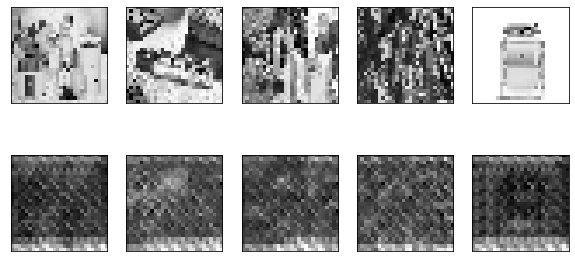

In [119]:
decoded_imgs = autoencoder.predict(X)

n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1+ n)
    #ax = plt.subplot(2, n+1, i+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
np.squeeze(test).shape

In [111]:
autoencoder.predict(trial)

ValueError: in user code:

    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /Users/denisdunn/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer conv2d_14 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 28]


In [106]:
trial=X[0].reshape(28,28)

In [108]:
plt.imshow(decoded_imgs(trial))
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model(r"C:\Users\dedunn\Desktop\weights-val_74-0.98.hdf5")

In [ ]:
model.summary()

In [ ]:
model=Sequential()
model.add(tensorflow.keras.layers.Conv2D(input_shape=(224,224,3),filters=32, kernel_size=(5,5),activation="relu", padding="same")),
model.add(tensorflow.keras.layers.Dropout(0.5)),
model.add(tensorflow.keras.layers.BatchNormalization(axis=-1)),
#model.add(tensorflow.keras.layers.Activation("relu")),
model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(5, 5), strides=(1,1), padding='valid')),
#model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu")),
#model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu")),
#model.add(tensorflow.keras.layers.Dropout(0.5)),
#model.add(tensorflow.keras.layers.BatchNormalization(axis=-1)),
#model.add(tensorflow.keras.layers.Activation("relu")),
#model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(1,1), padding='valid')),
#model.add(tensorflow.keras.layers.Dropout(0.5)),
#model.add(tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same",activation="relu")),
model.add(tensorflow.keras.layers.BatchNormalization(axis=-1)),
#model.add(tensorflow.keras.layers.Activation("relu")),
#model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')),
#model.add(tensorflow.keras.layers.AveragePooling2D(pool_size=(4, 4), strides=(1,1), padding='valid')),
#model.add(tensorflow.keras.layers.Dropout(0.5)),
#model.add(tensorflow.keras.layers.Conv2D(filters=224, kernel_size=(3,3), padding="same", activation="relu")),
#model.add(tensorflow.keras.layers.Dropout(0.5)),
#model.add(tensorflow.keras.layers.BatchNormalization(axis=-1)),
#model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='valid')),
model.add(tensorflow.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)),
model.add(tensorflow.keras.layers.Flatten()),
model.add(tensorflow.keras.layers.Dense(44, activation='softmax')),